# Gearbox in range 0 - 2200 Hz

In [3]:
%load_ext autoreload

In [4]:
import numpy as np
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
import sys, os

ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
print("ROOT", ROOT_PATH)
module_path = os.path.abspath(os.path.join(ROOT_PATH+"/utils/"))
if module_path not in sys.path:
    print("appended")
    sys.path.append(module_path)

import functions as f

module_path = os.path.abspath(os.path.join(ROOT_PATH+"/data_processing/"))
if module_path not in sys.path:
    print("appended")
    sys.path.append(module_path)


%autoreload
import wt_data
import ff_transform
import explore_fft_time_data

ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
/Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src


In [5]:
'''
wt_name is either 'WTG01', 'WTG02', 'WTG03', or 'WTG04'

'''
def load_interval_specified_range(wt_name, BINS,SENSOR_NAME,lower_range_freq,higher_range_freq, load_minimal=False):
    wt_instance = wt_data.load_instance(wt_name, load_minimal=False)
    num_intervals = len(wt_instance.ten_second_intervals)
    print(f"This is the amount of intervals: {num_intervals}")
    
    y = []
    x = []
    z = []
    
    avg_powers = [] # Stores the average power for each interval
    
    two_d_plot = [[] for x in range(BINS)]
    
    avg_rot_speeds = []
    
    i = 0
    
    bin_indexes_ranges = []
    rms_bins_range_magnitudes = []
    
    for interval in wt_instance.ten_second_intervals:
        ts = interval.sensor_df['TimeStamp']  # Have this as the y-axis to see how the RMS/frequencies develop
        try:
            vibration_signal = interval.sensor_df[SENSOR_NAME]
        except:
            continue
            
        y_repeated = np.repeat(i, 50)  # Repeat this y value n times to use as the y value for the corresponding x (frequency) and z (magnitude)
        y.append(y_repeated)
        i = i + 1
        print(f"Interval {i} of {num_intervals}", end='\r')

        comp_type = 'gearbox'
        
        rot_data = interval.high_speed_rot_data
        avg_rot_speed = rot_data['mean']
        avg_rot_speeds.append(avg_rot_speed)
        
        avg_power = interval.op_df["PwrAvg;kW"][0]
        rot_data = interval.high_speed_rot_data
        
        fast = ff_transform.FastFourierTransform( vibration_signal, ts, comp_type)
        fft, time, centroid, rms, rms_bins, bin_freq = fast.fft_transform_time(
            rot_data,
            avg_power,
            get_rms_for_bins=True,
            plot=False,
            bins=BINS,
            plot_bin_lines=False,
            x_lim=False,
            frequency_lines=[],
            horisontal_lines=[],
            spectrum_lower_range = lower_range_freq,
            spectrum_higher_range = higher_range_freq
            )
        
        N = fast.s.size
        T = fast.t[1] - fast.t[0]
        f = np.linspace(0, 1 / T, N, )
        f = f[:N // 2]
        
        
        range_magnitude = fast.rms_bins_range_magnitude
        z.append(range_magnitude)
        x.append(fast.bin_indexes_range)
        every_bin_freq = np.round(fast.bin_indexes_range[1]-fast.bin_indexes_range[0])
        avg_powers.append(interval.op_df['PwrAvg;kW'][0])
        
        for j, rms_amplitude in enumerate(range_magnitude):
            two_d_plot[j].append(rms_amplitude)
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    
    return x,y,z, two_d_plot, avg_powers, avg_rot_speeds, every_bin_freq

# Loading RMS values etc. GbxHssRr

In [6]:
WIND_TURBINE = 'WTG01'
SENSOR_NAME = 'GbxHssRr;0,0102;m/s2'
BINS = 50

freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01,two_d_plot_tw01, avg_powers_wt01, avg_rot_speeds1,every_bin_freq01 = load_interval_specified_range(
    WIND_TURBINE,
    BINS,
    SENSOR_NAME,
    lower_range_freq = 0,
    higher_range_freq = 2300,
    load_minimal=False
    )


Loading WTG01...
Loaded WTG01
This is the amount of intervals: 415


In [ ]:
WIND_TURBINE = 'WTG02'
SENSOR_NAME = 'GbxHssRr;0,0102;m/s2'
BINS = 50

freqs_wt02, interval_nums_wt02, rms_amplitudes_wt02,two_d_plot_tw02,avg_powers_wt02, avg_rot_speeds2, every_bin_freq02 = load_interval_specified_range(
    WIND_TURBINE,
    BINS,
    SENSOR_NAME,
    lower_range_freq = 0,
    higher_range_freq = 2300,
    load_minimal=False
    )

WIND_TURBINE = 'WTG03'
SENSOR_NAME = 'GbxHssRr;0,0102;m/s2'
BINS = 50

freqs_wt03, interval_nums_wt03, rms_amplitudes_wt03,two_d_plot_tw03, avg_powers_wt03, avg_rot_speeds3,every_bin_freq03 = load_interval_specified_range(
    WIND_TURBINE,
    BINS,
    SENSOR_NAME,
    lower_range_freq = 0,
    higher_range_freq = 2300,
    load_minimal=False
    )

WIND_TURBINE = 'WTG04'
SENSOR_NAME = 'GbxHssRr;0,0102;m/s2'
BINS = 50

freqs_wt04, interval_nums_wt04, rms_amplitudes_wt04,two_d_plot_tw04,avg_powers_wt04, avg_rot_speeds4, every_bin_freq04 = load_interval_specified_range(
    WIND_TURBINE,
    BINS,
    SENSOR_NAME,
    lower_range_freq = 0,
    higher_range_freq = 2300,
    load_minimal=False
)
    


Loading WTG02...
Loaded WTG02
This is the amount of intervals: 426


# Filtering away noise

In [ ]:
# WT_01
avg_powers_filtered_wt01, RMS_per_bin_filtered_wt01, average_rpm_filtered_wt01,remove_indexes_wt01 = explore_fft_time_data.filter_data(
    avg_powers_wt01,
    two_d_plot_tw01,
    avg_rot_speeds1
)


# WT_02
avg_powers_filtered_wt02, RMS_per_bin_filtered_wt02, average_rpm_filtered_wt02,remove_indexes_wt02 = explore_fft_time_data.filter_data(
    avg_powers_wt02,
    two_d_plot_tw02,
    avg_rot_speeds2
)

# WT_03
avg_powers_filtered_wt03, RMS_per_bin_filtered_wt03, average_rpm_filtered_wt03,remove_indexes_wt03 = explore_fft_time_data.filter_data(
    avg_powers_wt03,
    two_d_plot_tw03,
    avg_rot_speeds3
)

# WT_04
avg_powers_filtered_wt04, RMS_per_bin_filtered_wt04, average_rpm_filtered_wt04, remove_indexes_wt04 = explore_fft_time_data.filter_data(
    avg_powers_wt04,
    two_d_plot_tw04,
    avg_rot_speeds4
)

In [ ]:
for i in range(len(bin_indexes_ranges)):
    plt.plot(bin_indexes_ranges[i],rms_bins_range_magnitudes[i])

# Plotting the 3d (frequencies, intervals, rms amplitudes)

In [ ]:
explore_fft_time_data.print3d_with_poly_collection("1",
                             remove_indexes_wt01,
                             freqs_wt01,
                             interval_nums_wt01, 
                             rms_amplitudes_wt01,
                             'color_alt4',
                             avg_powers_filtered_wt01,
                             'Blues',
                             False)

explore_fft_time_data.print3d_with_poly_collection("2",
                             remove_indexes_wt02,
                             freqs_wt02,
                             interval_nums_wt02, 
                             rms_amplitudes_wt02,
                             'color_alt4',
                             avg_powers_filtered_wt02,
                             'Blues',
                             False)

explore_fft_time_data.print3d_with_poly_collection("3",
                             remove_indexes_wt03,
                             freqs_wt03,
                             interval_nums_wt03, 
                             rms_amplitudes_wt03,
                             'color_alt4',
                             avg_powers_filtered_wt03,
                             'Blues',
                             False)

explore_fft_time_data.print3d_with_poly_collection("4",
                             remove_indexes_wt04,
                             freqs_wt04,
                             interval_nums_wt04, 
                             rms_amplitudes_wt04,
                             'color_alt4',
                             avg_powers_filtered_wt04,
                             'Blues',
                             False)

# Scatter Plot of RMS and ROT speed

In [ ]:
bin_steps = np.arange(0,50,5)
steps = bin_steps[1]-bin_steps[0]
# bin_steps = [0,5,15,20,25,]
for step in bin_steps:    
    explore_fft_time_data.scatter_plot_rms_rot_speed_time(np.arange(step,step + steps),"WTG01",two_d_plot_tw01,avg_rot_speeds1,every_bin_freq01)
    explore_fft_time_data.scatter_plot_rms_rot_speed_time(np.arange(step, step + steps),"WTG02",two_d_plot_tw02,avg_rot_speeds2,every_bin_freq02)
    explore_fft_time_data.scatter_plot_rms_rot_speed_time(np.arange(step, step  + steps),"WTG03",two_d_plot_tw03,avg_rot_speeds3,every_bin_freq03)
    explore_fft_time_data.scatter_plot_rms_rot_speed_time(np.arange(step, step + steps),"WTG04",two_d_plot_tw04,avg_rot_speeds4,every_bin_freq04)

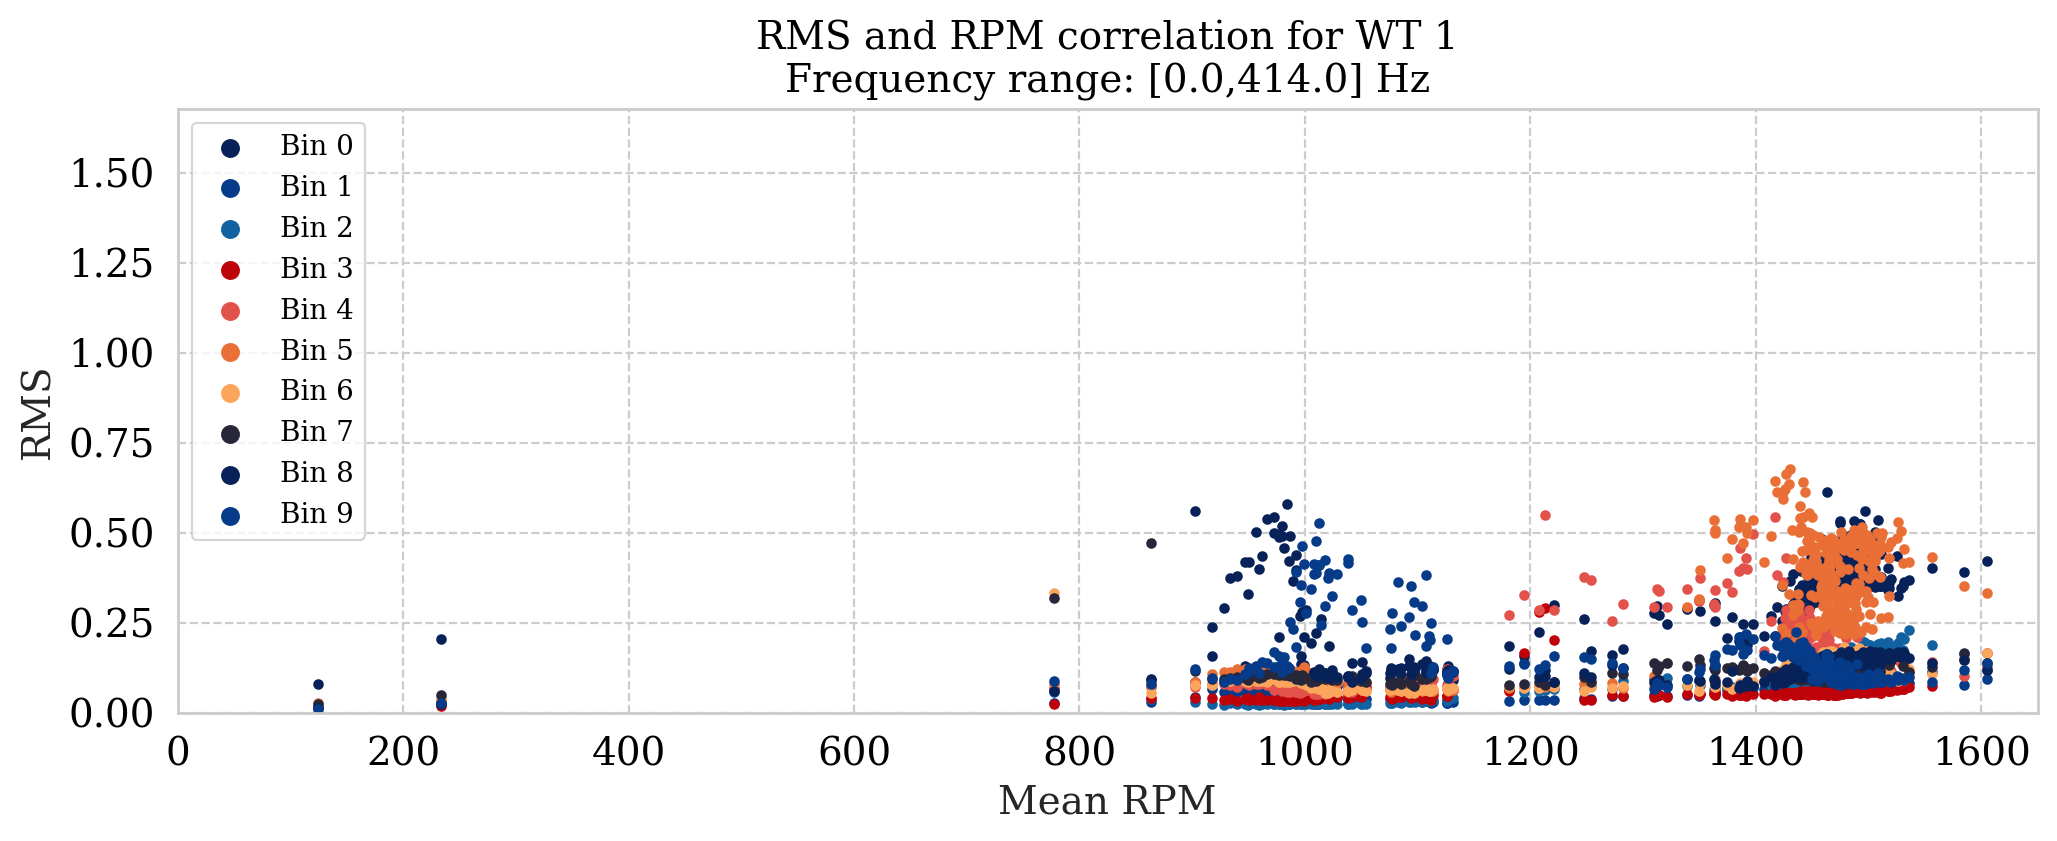

NameError: name 'two_d_plot_tw02' is not defined

In [8]:
import warnings
warnings.simplefilter('ignore')

plot_bin_range = np.arange(0,8)

bin_steps = [0,10,20,30,40]
for step in bin_steps:    

    explore_fft_time_data.scatter_plot_rms_rot_speed(np.arange(step,step + 10),"WTG01",two_d_plot_tw01,avg_rot_speeds1,every_bin_freq01)
    explore_fft_time_data.scatter_plot_rms_rot_speed(np.arange(step, step + 10),"WTG02",two_d_plot_tw02,avg_rot_speeds2,every_bin_freq02)
    explore_fft_time_data.scatter_plot_rms_rot_speed(np.arange(step, step  + 10),"WTG03",two_d_plot_tw03,avg_rot_speeds3,every_bin_freq03)
    explore_fft_time_data.scatter_plot_rms_rot_speed(np.arange(step, step + 10),"WTG04",two_d_plot_tw04,avg_rot_speeds4,every_bin_freq04)

#### Plotting RMS with Average power

In [ ]:
avg_pwr_wt_list = [avg_powers_filtered_wt01,avg_powers_filtered_wt02,
                   avg_powers_filtered_wt03,
                avg_powers_filtered_wt04]

wt_bin_list = [RMS_per_bin_filtered_wt01,RMS_per_bin_filtered_wt02,RMS_per_bin_filtered_wt03,RMS_per_bin_filtered_wt04]

bin_steps = [0,10,20,30,40]
for step in bin_steps:
    start = step
    end = step + 10
    [scatter_plot_rms_avg_power(np.arange(start,end),elem,wt_bin_list[i],"wt_0"+str(i+1)) for i, elem in enumerate(avg_pwr_wt_list)]
    plt.show()
